## Multiple Linear Regression (Multivariate Regression)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read dataset
# df = pd.read_csv('data/advertising_1.csv')
df = pd.read_csv('data/advertising_1.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
44,120.4,8.4,26.4,12.9
61,53.5,2.0,21.4,8.1
80,116.0,7.7,23.1,11.0
70,124.5,43.9,27.2,22.3
31,220.0,28.3,23.2,15.4


In [4]:
df.isnull().sum()   # ตรวจสอบมีข้อมูลสูญหาย? (check missing values) 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Visualization

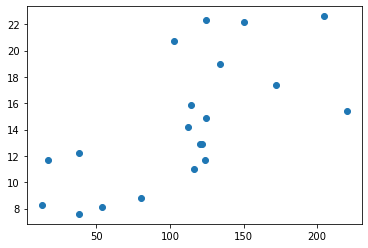

In [5]:
plt.scatter(df.TV, df.Sales)
plt.show()

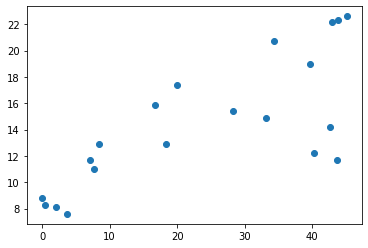

In [7]:
plt.scatter(df.Radio, df.Sales)
plt.show()

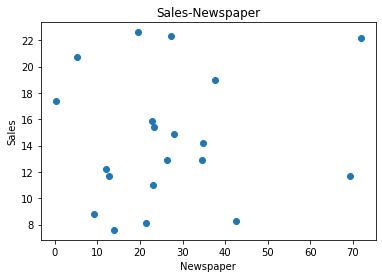

In [8]:
plt.scatter(df.Newspaper, df.Sales)
plt.title('Sales-Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

## Pairplot

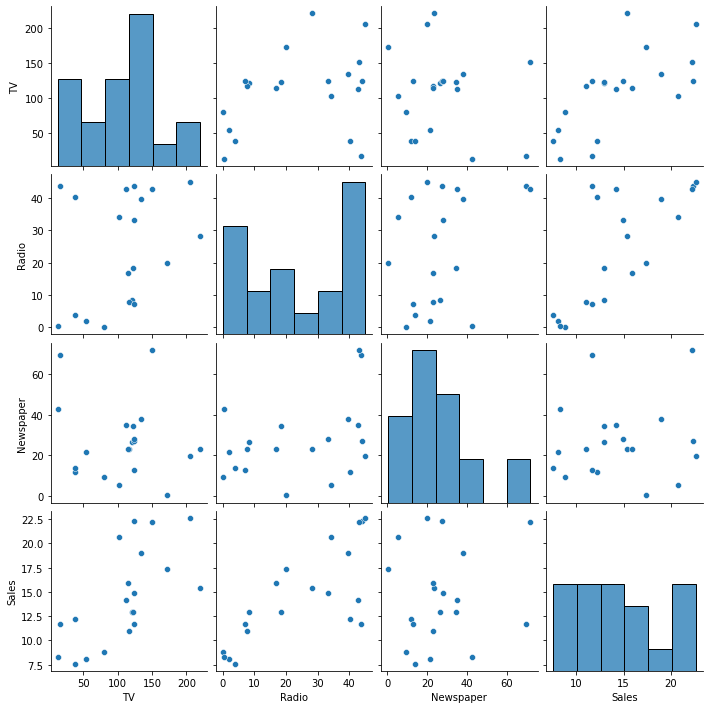

In [9]:
sns.pairplot(df)   
plt.show()

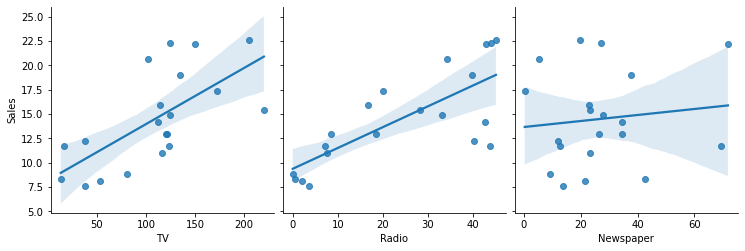

In [10]:
sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'],
                      y_vars='Sales', height=3.5, kind='reg'
    )
plt.show()

In [11]:
# Correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.318574,-0.163460,0.668370
Radio,0.318574,1.000000,0.368875,0.751720
Newspaper,-0.163460,0.368875,1.000000,0.117176
Sales,0.668370,0.751720,0.117176,1.000000


## Model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
dep_cols = ['TV','Radio','Newspaper']  # dependent vars columns (features)
X = df[dep_cols]

# X = df.drop(['Sales'], axis=1)
y = df.Sales

In [14]:
X.head()

,TV,Radio,Newspaper
44,120.4,8.4,26.4
61,53.5,2.0,21.4
80,116.0,7.7,23.1
70,124.5,43.9,27.2
31,220.0,28.3,23.2


In [15]:
y.head()

44    12.9
61     8.1
80    11.0
70    22.3
31    15.4
Name: Sales, dtype: float64

In [16]:
df.head()

,TV,Radio,Newspaper,Sales
44,120.4,8.4,26.4,12.9
61,53.5,2.0,21.4,8.1
80,116.0,7.7,23.1,11.0
70,124.5,43.9,27.2,22.3
31,220.0,28.3,23.2,15.4


### Train Model และ ประเมิน 

In [17]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [18]:
model.score(X, y)

0.7706783104527418

In [19]:
y_predict = model.predict(X)    # R2
r2_score(y, y_predict)

0.7706783104527418

In [20]:
mean_squared_error(y, y_predict)

5.202139595210598

In [21]:
mean_absolute_error(y, y_predict)

1.8399385719735377

## Predict ทำนาย

In [22]:
df.head()

,TV,Radio,Newspaper,Sales
44,120.4,8.4,26.4,12.9
61,53.5,2.0,21.4,8.1
80,116.0,7.7,23.1,11.0
70,124.5,43.9,27.2,22.3
31,220.0,28.3,23.2,15.4


In [23]:
x_input = [[125.1, 9.8, 27.1]]   # TV, Radio, Newspaper
model.predict(x_input)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.6574858])

## สมการ Model

In [24]:
model.coef_         # สัมประสิทธ์

array([ 0.04039   ,  0.17537395, -0.00883801])

In [26]:
model.intercept_    # intercept (b)

6.125542594670357

In [27]:
list(zip(dep_cols, model.coef_))  # รวมข้อมูลเป็น List เดียวกัน Features , Coefficient (slope) 

[('TV', 0.04038999622400112),
 ('Radio', 0.17537394630054162),
 ('Newspaper', -0.00883800738595153)]

In [28]:
# x_input (predict) = [125.1, 9.8, 27.1]
125.1*0.04039 + 9.8*0.175373 + 27.1*(-0.008838) + 6.125542

12.657476599999999

In [29]:
# ทำนาย (Predict) หลาย case
x_input = [ [0, 0, 0],
            [0, 0, 10],
            [216.5, 43.8, 27.1],
            [182.0, 78.3, 27.1],
            [180.0, 107.4, 0],
            [1.0, 286.4, 0]]
y_pred = model.predict(x_input)
y_pred

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 6.12554259,  6.03716252, 22.31184562, 26.9687919 , 32.23090375,
       56.39303081])

In [30]:
import numpy as np
x_in = np.array(x_input)

x_in.sum(axis=1)

array([  0. ,  10. , 287.4, 287.4, 287.4, 287.4])

In [31]:
216.5 + 43.8 + 27.1

287.40000000000003

In [32]:
182.0 + 78.3 + 27.1

287.40000000000003

## สรุป Report

In [33]:
print('|   TV  | Radio | Newsp |   Sales ')
for i, x in enumerate(x_input):
    print(f'| {x[0]:5} | {x[1]:5} | {x[2]:5} | = {y_pred[i] :5.2f}')

|   TV  | Radio | Newsp |   Sales 
|     0 |     0 |     0 | =  6.13
|     0 |     0 |    10 | =  6.04
| 216.5 |  43.8 |  27.1 | = 22.31
| 182.0 |  78.3 |  27.1 | = 26.97
| 180.0 | 107.4 |     0 | = 32.23
|   1.0 | 286.4 |     0 | = 56.39


In [34]:
x_in_sum = x_in.sum(axis=1)

In [35]:
# สรุป Report
print('|   TV  | Radio | Newsp |  Sum  |  Sales ')
for i, x in enumerate(x_input):
    print('| {:5} | {:5} | {:5} | {:5.1f} | = {:5.2f}'.
          format(x[0],x[1],x[2],x_in_sum[i],y_pred[i] ))

|   TV  | Radio | Newsp |  Sum  |  Sales 
|     0 |     0 |     0 |   0.0 | =  6.13
|     0 |     0 |    10 |  10.0 | =  6.04
| 216.5 |  43.8 |  27.1 | 287.4 | = 22.31
| 182.0 |  78.3 |  27.1 | 287.4 | = 26.97
| 180.0 | 107.4 |     0 | 287.4 | = 32.23
|   1.0 | 286.4 |     0 | 287.4 | = 56.39


In [36]:
# สรุป Report
print('|   TV  | Radio | Newsp |  Sum  |  Sales ')
for i, x in enumerate(x_input):
    print(f'| {x[0]:5} | {x[1]:5} | {x[2]:5} | {x_in_sum[i]:5.1f} | = {y_pred[i] :5.2f}')

|   TV  | Radio | Newsp |  Sum  |  Sales 
|     0 |     0 |     0 |   0.0 | =  6.13
|     0 |     0 |    10 |  10.0 | =  6.04
| 216.5 |  43.8 |  27.1 | 287.4 | = 22.31
| 182.0 |  78.3 |  27.1 | 287.4 | = 26.97
| 180.0 | 107.4 |     0 | 287.4 | = 32.23
|   1.0 | 286.4 |     0 | 287.4 | = 56.39


In [ ]:
for i, x in enumerate(x_input):
    print(x, x_in_sum[i], y_pred[i])